In [14]:
import glob
import json

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import numpy as np
import torch

In [64]:
import sklearn
from sklearn.cluster import KMeans

In [6]:
survival_info = pd.read_csv('/dataSRI/DataSets/BrATS/MICCAI_BraTS2020_TrainingData/survival_info.csv')

In [7]:
survival_info = survival_info.rename(columns={'Brats20ID': 'subj_id'})

In [10]:
with open('split_preprocessing/saved_ids.json', 'r') as f:
    split_data = json.load(f)

In [11]:
data = []
for train_id in split_data['train_ids']:
    data.append({
        'subj_id': train_id,
        'split': 'train',
    })
for val_id in split_data['val_ids']:
    data.append({
        'subj_id': val_id,
        'split': 'val',
    })
split_df = pd.DataFrame(data)

In [12]:
survival_info = survival_info.join(split_df.set_index('subj_id'), on='subj_id')

In [37]:
#alpha_df = survival_info.join(alpha_df.set_index('subj_id'), on='subj_id')

In [129]:
features.keys()

dict_keys(['subj_id', 'whole_brain_size', 'et_pred_size', 'tc_pred_size', 'wt_pred_size', 'et_gt_size', 'tc_gt_size', 'wt_gt_size', 'alphas', 'errors', 'mean_dice', 'et_dice', 'tc_dice', 'wt_dice'])

In [124]:
features['alphas'].keys()

dict_keys(['entire_cls0_alphas', 'entire_cls1_alphas', 'entire_cls2_alphas', 'fn_cls0_alphas', 'fn_cls1_alphas', 'fn_cls2_alphas', 'fp_cls0_alphas', 'fp_cls1_alphas', 'fp_cls2_alphas'])

In [125]:
targets = ['entire_cls0_alphas', 'entire_cls1_alphas', 'entire_cls2_alphas', 'fn_cls0_alphas', 'fn_cls1_alphas', 'fn_cls2_alphas', 'fp_cls0_alphas', 'fp_cls1_alphas', 'fp_cls2_alphas']

In [186]:
def precision(errors, clsi):
    prec = errors['tp']['counts'][clsi] / (errors['tp']['counts'][clsi] + errors['fp']['counts'][clsi])
    return float(prec)
def recall(errors, clsi):
    prec = errors['tp']['counts'][clsi] / (errors['tp']['counts'][clsi] + errors['fn']['counts'][clsi])
    return float(prec)

In [187]:
alpha_data = []
alpha_files = glob.glob('data/models/unet_resize2/alpha_analysis/result_dataset/alpha_data*.pt')
for fname in alpha_files:
    features = torch.load(fname, map_location='cpu')
    targets = features['alphas'].keys()
    for target in targets:
        alpha_data.append({
            'subj_id': features['subj_id'],
            'et_ratio': float(features['et_pred_size'] / features['whole_brain_size']),
            'tc_ratio': float(features['tc_pred_size'] / features['whole_brain_size']),
            'wt_ratio': float(features['wt_pred_size'] / features['whole_brain_size']),
            'et_ratio_gt': float(features['et_gt_size'] / features['whole_brain_size']),
            'tc_ratio_gt': float(features['tc_gt_size'] / features['whole_brain_size']),
            'wt_ratio_gt': float(features['wt_gt_size'] / features['whole_brain_size']),
            'precision_et': precision(features['errors'], 0),
            'precision_tc': precision(features['errors'], 1),
            'precision_wt': precision(features['errors'], 2),
            'recall_et': recall(features['errors'], 0),
            'recall_tc': recall(features['errors'], 1),
            'recall_wt': recall(features['errors'], 2),
            'target': target,
            'alphas': features['alphas'][target],
            'mean_dice': float(features['mean_dice']),
            'et_dice': float(features['et_dice']),
            'tc_dice': float(features['tc_dice']),
            'wt_dice': float(features['wt_dice']),
        })
alpha_df = pd.DataFrame(alpha_data)

/dataSRI/MICHAELC/anaconda3/envs/pytorch/lib/python3.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in float_scalars
  """


In [188]:
alpha_df

,subj_id,et_ratio,tc_ratio,wt_ratio,et_ratio_gt,tc_ratio_gt,wt_ratio_gt,precision_et,precision_tc,precision_wt,recall_et,recall_tc,recall_wt,target,alphas,mean_dice,et_dice,tc_dice,wt_dice
0,BraTS20_Training_030,0.004483,0.004821,0.063526,0.003848,0.005019,0.063967,0.695972,0.865932,0.794963,0.917976,0.940288,0.870597,entire_cls0_alphas,"[[0.9999875, 0.8550363, 0.47698358, 0.0]]",0.787002,0.760825,0.796625,0.803557
1,BraTS20_Training_030,0.004483,0.004821,0.063526,0.003848,0.005019,0.063967,0.695972,0.865932,0.794963,0.917976,0.940288,0.870597,entire_cls1_alphas,"[[0.99999386, 0.8832991, 0.54586834, 0.0]]",0.787002,0.760825,0.796625,0.803557
2,BraTS20_Training_030,0.004483,0.004821,0.063526,0.003848,0.005019,0.063967,0.695972,0.865932,0.794963,0.917976,0.940288,0.870597,entire_cls2_alphas,"[[0.999996, 0.89145136, 0.6309952, 0.0]]",0.787002,0.760825,0.796625,0.803557
3,BraTS20_Training_030,0.004483,0.004821,0.063526,0.003848,0.005019,0.063967,0.695972,0.865932,0.794963,0.917976,0.940288,0.870597,fn_cls0_alphas,"[[0.999996, 0.891207, 0.63139117, 0.0]]",0.787002,0.760825,0.796625,0.803557
4,BraTS20_Training_030,0.004483,0.004821,0.063526,0.003848,0.005019,0.063967,0.695972,0.865932,0.794963,0.917976,0.940288,0.870597,fn_cls1_alphas,"[[0.999996, 0.8912772, 0.6321358, 0.0]]",0.787002,0.760825,0.796625,0.803557
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1315,BraTS20_Training_349,0.041972,0.078605,0.139966,0.049548,0.090290,0.146241,0.861473,0.960561,0.954731,0.743107,0.796251,0.915192,tn_cls1_alphas,"[[0.0, 0.52242184, 0.5437874, 0.9999943]]",0.878158,0.811098,0.895025,0.928350
1316,BraTS20_Training_349,0.041972,0.078605,0.139966,0.049548,0.090290,0.146241,0.861473,0.960561,0.954731,0.743107,0.796251,0.915192,tn_cls2_alphas,"[[0.0, 0.48564723, 0.76937586, 0.99999154]]",0.878158,0.811098,0.895025,0.928350
1317,BraTS20_Training_349,0.041972,0.078605,0.139966,0.049548,0.090290,0.146241,0.861473,0.960561,0.954731,0.743107,0.796251,0.915192,tp_cls0_alphas,"[[0.0, 0.4798774, 0.88816977, 0.999991]]",0.878158,0.811098,0.895025,0.928350
1318,BraTS20_Training_349,0.041972,0.078605,0.139966,0.049548,0.090290,0.146241,0.861473,0.960561,0.954731,0.743107,0.796251,0.915192,tp_cls1_alphas,"[[0.0, 0.5369707, 0.9416872, 0.99999285]]",0.878158,0.811098,0.895025,0.928350


In [ ]:
do a kmeans for each target, then show a grid of centroid heatmaps for different targets

In [189]:
def cluster(df):
    X = np.stack(df.alphas)[:, 0]
    for K in [6]: #range(2, 16):
        kmeans = KMeans(n_clusters=5)
        labels = kmeans.fit_predict(X)
        dists = kmeans.transform(X)
        cost = dists.min(axis=1).mean()
        print(f'K: {K}, cost: {cost}')
    return kmeans, labels

In [190]:
kmeans, labels = cluster(alpha_df)

K: 6, cost: 0.35475265979766846


In [191]:
alpha_df['labels'] = labels

In [192]:
alpha_df.groupby('labels').agg(['mean', 'std']).style.background_gradient()

Text(0.5, 1.0, 'ET Dice Score Histogram Per Cluster')

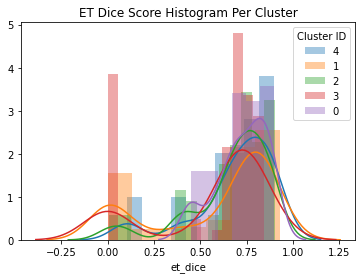

In [159]:
for label in alpha_df['labels'].unique():
    df = alpha_df[alpha_df['labels'] == label]
    sns.distplot(df['et_dice'], label=label)
plt.legend(title='Cluster ID')
plt.title('ET Dice Score Histogram Per Cluster')

Text(0.5, 1.0, 'TC Dice Score Histogram Per Cluster')

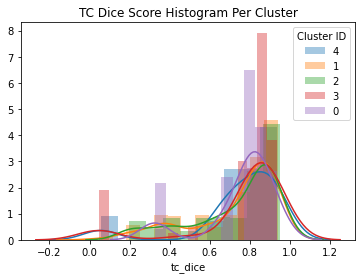

In [160]:
for label in alpha_df['labels'].unique():
    df = alpha_df[alpha_df['labels'] == label]
    sns.distplot(df['tc_dice'], label=label)
plt.legend(title='Cluster ID')
plt.title('TC Dice Score Histogram Per Cluster')

Text(0.5, 1.0, 'WT Dice Score Histogram Per Cluster')

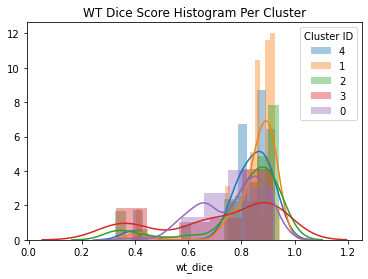

In [163]:
for label in alpha_df['labels'].unique():
    df = alpha_df[alpha_df['labels'] == label]
    sns.distplot(df['wt_dice'], label=label)
plt.legend(title='Cluster ID')
plt.title('WT Dice Score Histogram Per Cluster')

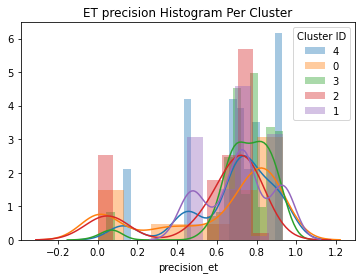

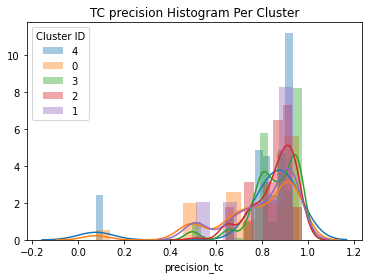

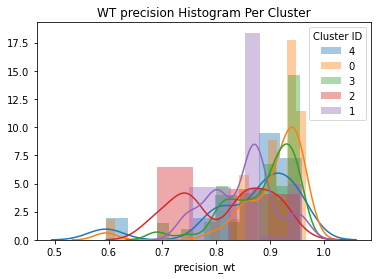

In [193]:
for cls in ['et', 'tc', 'wt']:
    plt.figure()
    for label in alpha_df['labels'].unique():
        df = alpha_df[alpha_df['labels'] == label]
        sns.distplot(df[f'precision_{cls}'], label=label)
    plt.legend(title='Cluster ID')
    plt.title(f'{cls.upper()} precision Histogram Per Cluster')

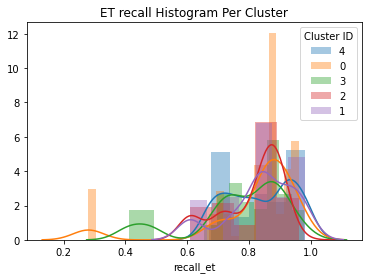

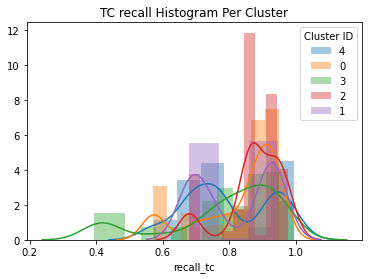

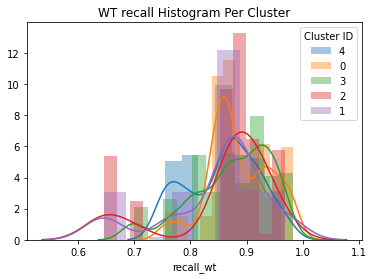

In [194]:
for cls in ['et', 'tc', 'wt']:
    plt.figure()
    for label in alpha_df['labels'].unique():
        df = alpha_df[alpha_df['labels'] == label]
        sns.distplot(df[f'recall_{cls}'], label=label)
    plt.legend(title='Cluster ID')
    plt.title(f'{cls.upper()} recall Histogram Per Cluster')

([<matplotlib.axis.XTick at 0x7f331dfbcc88>,
 [Text(0.5, 0, 't1'),
  Text(1.5, 0, 't2'),
  Text(2.5, 0, 't2flair'),
  Text(3.5, 0, 't1ce')])

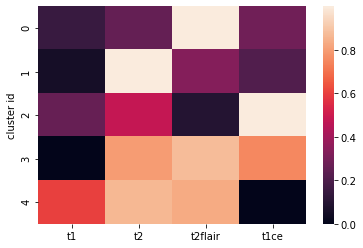

In [195]:
sns.heatmap(kmeans.cluster_centers_)
plt.ylabel('cluster id')
plt.xticks([0.5, 1.5, 2.5, 3.5], ['t1', 't2', 't2flair', 't1ce'])